In this notebook, I was providing initial conditions for Matt Scoggins at several quijote cosmologies spanning a cross around the fiducial in the latin hypercube.

Stuff has moved around in the data directory so this won't run anymore.

In [3]:
%load_ext autoreload
%autoreload 2

import os
os.environ["PYBORG_QUIET"] = "yes"  # noqa
os.environ['OPENBLAS_NUM_THREADS'] = '16' # noqa

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
lhpath = '../data/quijote/source/latin_hypercube_params.txt'

cols = ['omega_m', 'omega_b', 'h', 'n_s', 'sigma8']
lhlist = pd.read_csv(lhpath, index_col=None, header=None, sep=' ')
lhlist.columns = cols

fid = [0.3175, 0.049, 0.6711, 0.9624, 0.834]
fid = pd.DataFrame(fid, index=cols).T

In [5]:
mins, maxs = lhlist.min(axis=0), lhlist.max(axis=0)

savecols = ['omega_m', 'sigma8']
mask = np.zeros(len(lhlist), dtype=bool)
for c in cols:
    if c in savecols:
        tol = 0.02 * (maxs[c] - mins[c])
        mask |= np.isclose(lhlist[c], fid[c], atol=tol)

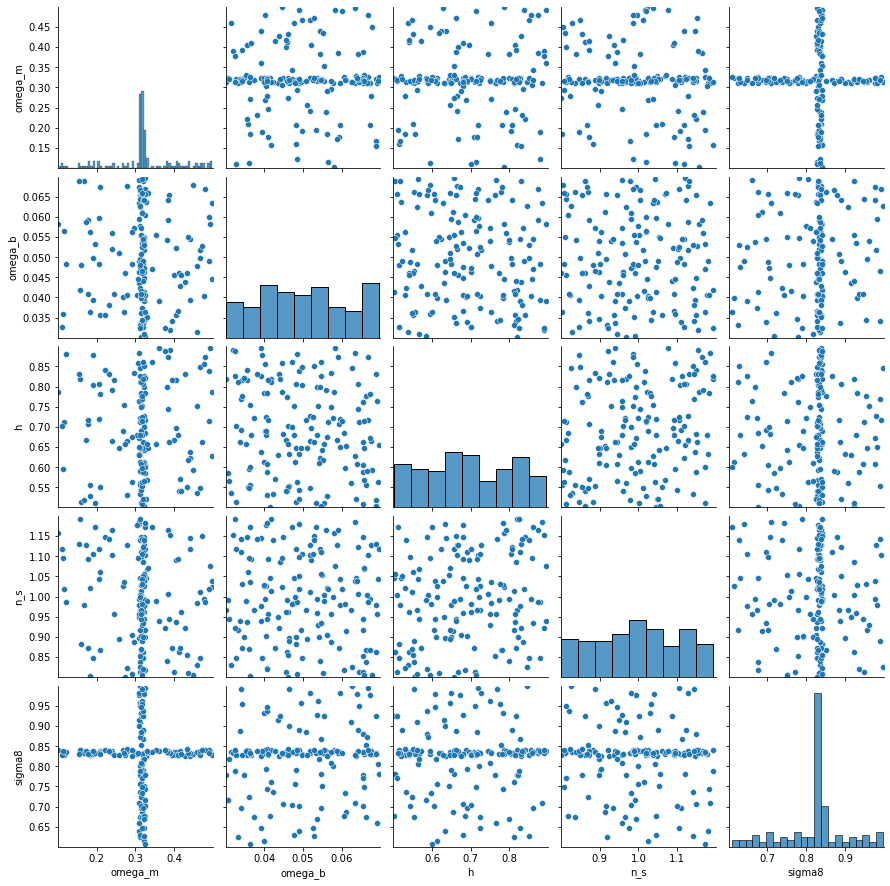

In [6]:
g = sns.pairplot(lhlist[mask])

for i in range(len(cols)):
    for j in range(len(cols)):
        g.axes[j,i].set_xlim(mins.iloc[i], maxs.iloc[i])
        if i != j:
            g.axes[j,i].set_ylim(mins.iloc[j], maxs.iloc[j])

In [ ]:
Nsamp = 20

lhchoice = np.argwhere(mask).flatten()

# choose on omega_m
lhchoice1 = sorted(lhchoice, key=lambda x: lhlist.iloc[x, 0])[::2*len(lhchoice)//(Nsamp)]
lhchoice2 = sorted(lhchoice, key=lambda x: lhlist.iloc[x, -1])[::2*len(lhchoice)//(Nsamp)]
lhchoice = list(set(lhchoice1).union(set(lhchoice2)))
lhchoice = np.sort(lhchoice)
print(' '.join(lhchoice.astype(str)))

324 391 401 406 444 485 502 592 694 926 944 1026 1122 1323 1515 1582 1608 1696 1702 1710 1951


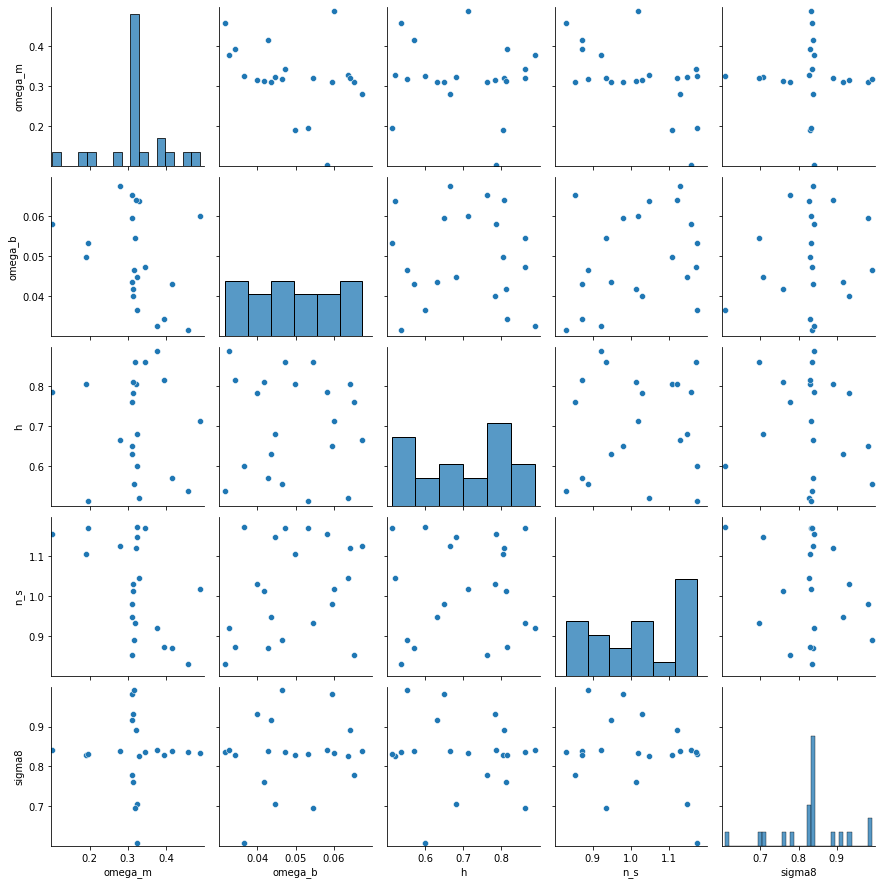

In [ ]:
g = sns.pairplot(lhlist.iloc[lhchoice])

for i in range(len(cols)):
    for j in range(len(cols)):
        g.axes[j,i].set_xlim(mins.iloc[i], maxs.iloc[i])
        if i != j:
            g.axes[j,i].set_ylim(mins.iloc[j], maxs.iloc[j])

In [ ]:
mins, maxs = lhlist.min(axis=0), lhlist.max(axis=0)

savecols = ['omega_m', 'sigma8']
mask = np.ones(len(lhlist), dtype=bool)
for c in cols:
    if c not in savecols:
        tol = 0.2 * (maxs[c] - mins[c])
        mask &= np.isclose(lhlist[c], fid[c], atol=tol)
print(np.sum(mask))

109


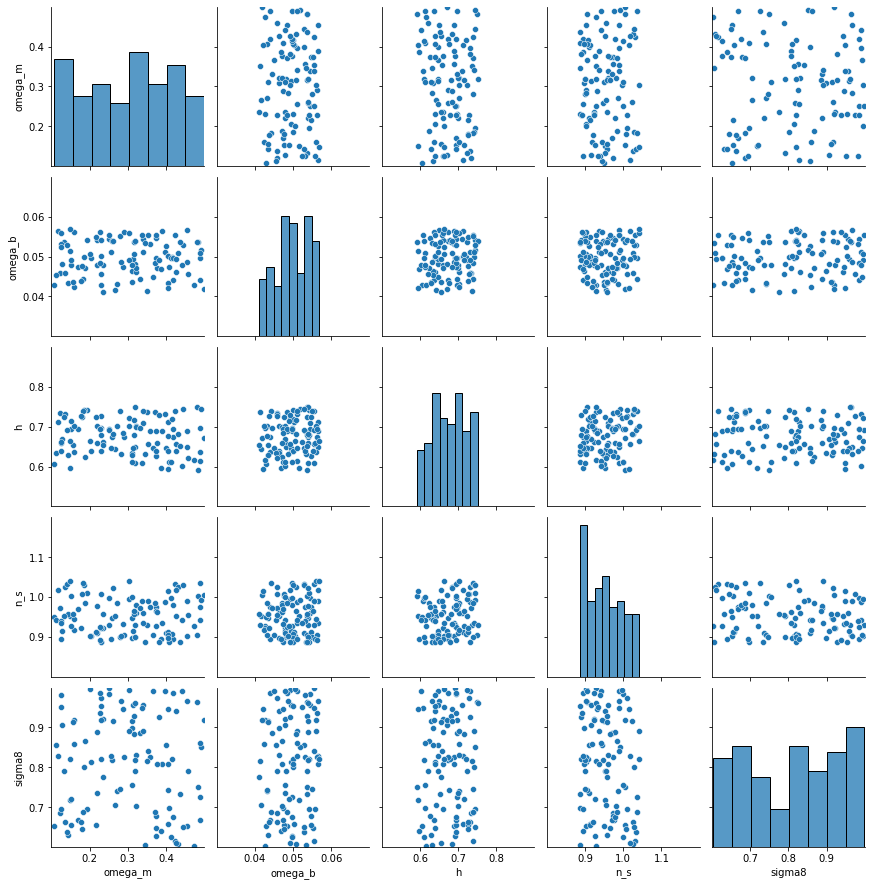

In [ ]:
g = sns.pairplot(lhlist[mask])

for i in range(len(cols)):
    for j in range(len(cols)):
        g.axes[j,i].set_xlim(mins.iloc[i], maxs.iloc[i])
        if i != j:
            g.axes[j,i].set_ylim(mins.iloc[j], maxs.iloc[j])

In [ ]:
lhchoice = sorted(np.argwhere(mask).flatten())
print(' '.join([str(x) for x in lhchoice]))
print(','.join([str(x) for x in lhchoice]))

52 92 113 114 115 128 130 151 188 225 292 332 354 395 428 434 457 485 487 497 527 537 559 609 621 663 724 780 826 832 844 884 917 936 937 940 951 956 958 980 984 992 997 1071 1075 1081 1098 1123 1124 1129 1130 1154 1173 1179 1193 1207 1211 1219 1269 1273 1276 1298 1310 1320 1329 1336 1345 1368 1369 1373 1381 1393 1404 1413 1429 1443 1448 1455 1460 1503 1519 1522 1539 1550 1551 1569 1573 1574 1591 1594 1599 1630 1687 1705 1712 1731 1734 1790 1811 1814 1838 1847 1856 1864 1880 1888 1928 1956 1982
52,92,113,114,115,128,130,151,188,225,292,332,354,395,428,434,457,485,487,497,527,537,559,609,621,663,724,780,826,832,844,884,917,936,937,940,951,956,958,980,984,992,997,1071,1075,1081,1098,1123,1124,1129,1130,1154,1173,1179,1193,1207,1211,1219,1269,1273,1276,1298,1310,1320,1329,1336,1345,1368,1369,1373,1381,1393,1404,1413,1429,1443,1448,1455,1460,1503,1519,1522,1539,1550,1551,1569,1573,1574,1591,1594,1599,1630,1687,1705,1712,1731,1734,1790,1811,1814,1838,1847,1856,1864,1880,1888,1928,1956,1982


## check consistency

In [7]:
import numpy as np
import matplotlib.pyplot as plt

i = 0
lhs = [324,391,401,406,444,485,502,592,694,926,944,1026,1122,1323,1515,1582,1608,1696,1702,1710,1951]

In [8]:
lhid = lhs[i]
path = f"../data/jax1lpt/L1000-N512/{lhid}/rho.npy"
lrho = np.load(path)

path = f"/home/mattho/data/quijote/density_field/latin_hypercube/{lhid}/df_m_z=0.npy"
nrho = np.load(path)

mrho = lrho.reshape((32, 16, 32, 16, 32, 16), order='C').mean(axis=(1, 3, 5))

f, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mrho[0], vmin=-1, vmax=2)
axs[0].set_title('jax1lpt')
axs[1].imshow(nrho[0], vmin=-1, vmax=2)
axs[1].set_title('quijote')
axs[2].imshow(mrho[0]-nrho[0])
axs[2].set_title('diff')

i+=1

FileNotFoundError: [Errno 2] No such file or directory: '../data/jax1lpt/L1000-N512/324/rho.npy'

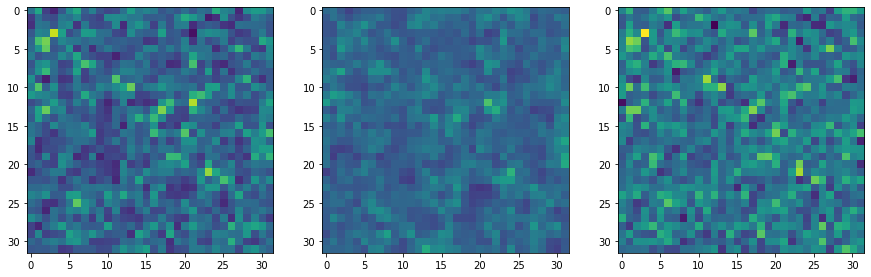

In [ ]:
mrho = lrho.reshape((32, 16, 32, 16, 32, 16), order='C').mean(axis=(1, 3, 5))

f, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(mrho[0], vmin=-1, vmax=2)
axs[1].imshow(nrho[0], vmin=-1, vmax=2)
axs[2].imshow(mrho[0]-nrho[0])
plt.colorbar(m)

# check again

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
datadir = '/home/mattho/git/ltu-cmass/data/quijote/borg1lpt/113'
disp = np.load(f'{datadir}/dis.npy')
vel = np.load(f'{datadir}/vel.npy')
rho = np.load(f'{datadir}/rho.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mattho/git/ltu-cmass/data/quijote/borg1lpt/113/rho.npy'

In [6]:
path = '/home/mattho/git/ltu-cmass/data/quijote/source/density_field/latin_hypercube/113/df_m_128_z=0.npy'
rtrue = np.load(path)

(-0.5, 127.5, 127.5, -0.5)

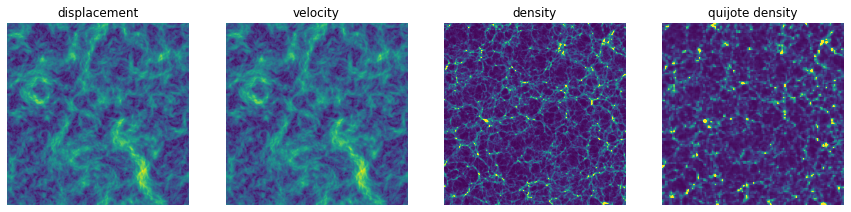

In [9]:
f, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(np.linalg.norm(disp[:, 100], axis=0))
axs[0].set_title('displacement')
axs[0].axis('off')
axs[1].imshow(np.linalg.norm(vel[:, 100], axis=0))
axs[1].set_title('velocity')
axs[1].axis('off')
axs[2].imshow(np.mean(rho[90:110], axis=0), vmin=-1, vmax=5)
axs[2].set_title('density')
axs[2].axis('off')

lmin = int(90/1024*128)
lmax = int(110/1024*128)
axs[3].imshow(np.mean(rtrue[lmin:lmax], axis=0), vmin=-1, vmax=5)
axs[3].set_title('quijote density')
axs[3].axis('off')


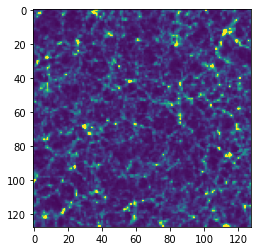

In [7]:
lmin = int(90/1024*128)
lmax = int(110/1024*128)
plt.imshow(np.mean(rtrue[lmin:lmax], axis=0), vmin=-1, vmax=5)

In [27]:
def load_modes(fn):
    """Loading in Fourier space."""
    num_mesh_1d = 128
    num_modes_last_d = num_mesh_1d // 2 + 1
    with open(fn, 'rb') as f:
        num_read = np.fromfile(f, np.uint32, 1)[0]
        modes = np.fromfile(f, np.complex128, num_read).reshape(
            (num_mesh_1d, num_mesh_1d, num_modes_last_d))
    return modes

path = '/home/mattho/git/ltu-cmass/data/quijote/wn_quijote/wn_52.dat'
ics = load_modes(path)

In [28]:
c = np.fft.irfftn(ics)

(128, 128, 128)


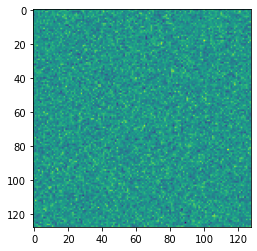

In [29]:
plt.imshow(c[:,:,15])#, vmin=-1e-5, vmax=1e-5)
print(c.shape)

Text(0.5, 1.0, 'ICs real part')

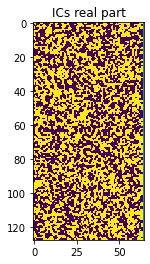

In [30]:
plt.imshow(ics.real[100], vmin=-1e-5, vmax=1e-5)
plt.title('ICs real part')